Bird EDA

Library


In [60]:
!pip install "notebook>=6.4.5" "ipywidgets>=7.6" nbformat>=4.2



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
import os
import ast
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
import librosa.display
import IPython.display as display
import seaborn as sns
import random
from glob import glob
from tqdm import tqdm
tqdm.pandas()  # enable progress bars in pandas operations
import gc
import sklearn
import json
# Import for visualization
import matplotlib as mpl
#cmap = mpl.cm.get_cmap('coolwarm')
import cv2

# WandB for experiment tracking
from setuptools import distutils
import torchaudio
import plotly.express as px
from IPython.display import Audio
from shapely.geometry import Point
import plotly.io as pio

# Set default renderer
pio.renderers.default = "notebook"  # or "iframe"

Data loading

In [57]:
path = 'E:/Desktop/BU/2025 Spring/MA679_Bird2025/'
os.listdir('E:/Desktop/BU/2025 Spring/MA679_Bird2025/')
train_meta = pd.read_csv(path +'train.csv')
# test_data = pd.read_csv(path+'test.csv')
ebird_data = pd.read_csv('taxonomy.csv')
# samp_subm = pd.read_csv('sample_submission.csv')

# with open(path+'scored_birds.json') as f:
    # scored_birds = json.load(f)

Functions

In [16]:
def read_ogg_file(path, file):
    """ Read ogg audio file and return numpay array and samplerate"""
    
    data, samplerate = sf.read(path+file)
    return data, samplerate


def plot_audio_file(data, samplerate):
    """ Plot the audio data"""
    
    sr = samplerate
    fig = plt.figure(figsize=(8, 4))
    x = range(len(data))
    y = data
    plt.plot(x, y)
    plt.plot(x, y, color='red')
    plt.legend(loc='upper center')
    plt.grid()
    
    
def plot_spectrogram(data, samplerate):
    """ Plot spectrogram with mel scaling """
    
    sr = samplerate
    spectrogram = librosa.feature.melspectrogram(y=data, sr=sr)
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    librosa.display.specshow(log_spectrogram, sr=sr, x_axis='time', y_axis='mel')

In [17]:
train_meta.head()

,primary_label,secondary_labels,type,filename,collection,rating,url,latitude,longitude,scientific_name,common_name,author,license
0,1139490,[''],[''],1139490/CSA36385.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0
1,1139490,[''],[''],1139490/CSA36389.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0
2,1192948,[''],[''],1192948/CSA36358.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0
3,1192948,[''],[''],1192948/CSA36366.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.2800,-73.8582,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0
4,1192948,[''],[''],1192948/CSA36373.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0


In [29]:
print('Number of subfolders/species:', len(os.listdir(path+'/train_audio')))

Number of subfolders/species: 206


In [20]:
ebird_data.head()

,primary_label,inat_taxon_id,scientific_name,common_name,class_name
0,1139490,1139490,Ragoniella pulchella,Ragoniella pulchella,Insecta
1,1192948,1192948,Oxyprora surinamensis,Oxyprora surinamensis,Insecta
2,1194042,1194042,Copiphora colombiae,Copiphora colombiae,Insecta
3,126247,126247,Leptodactylus insularum,Spotted Foam-nest Frog,Amphibia
4,1346504,1346504,Neoconocephalus brachypterus,Neoconocephalus brachypterus,Insecta


In [22]:
row = 0
train_meta.iloc[row]
label = train_meta.loc[row, 'primary_label']
filename = train_meta.loc[row, 'filename']

print(filename)
# Check if the file is in the folder
filename.split('/')[1] in os.listdir(path+'train_audio/'+label)

1139490/CSA36385.ogg


True

In [25]:
data, samplerate = sf.read(path+'train_audio/'+filename)
print('snipe of data:', data[:4])
print('samplerate:', samplerate)

snipe of data: [-2.95447444e-06  2.92587974e-05  2.81379762e-05 -7.88129569e-07]
samplerate: 32000


C:\Users\mlsdb\AppData\Local\Temp\ipykernel_18216\2021786118.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper center')


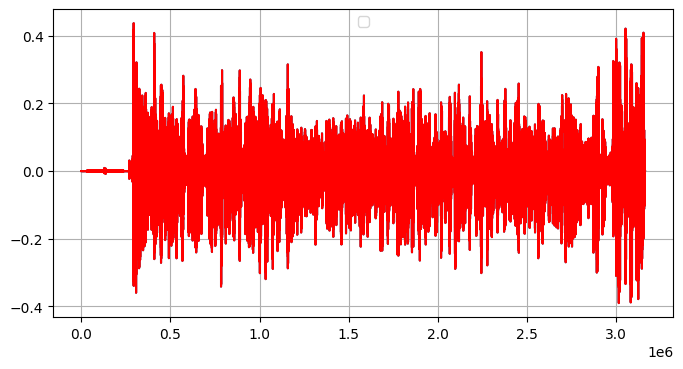

In [26]:
plot_audio_file(data, samplerate)

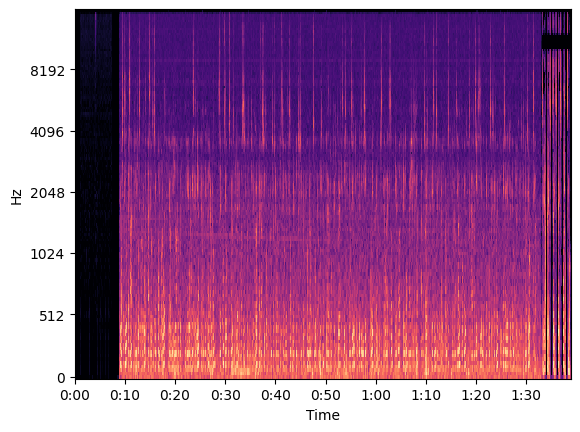

In [27]:
plot_spectrogram(data, samplerate)

In [28]:
display.Audio(path+'train_audio/'+filename)

In [64]:

fig = px.scatter_mapbox(
    train_meta,
    lat='latitude',
    lon='longitude',
    color='primary_label',
    hover_name='primary_label',
    hover_data=['latitude', 'longitude'],
    zoom=1,
    height=600,
    title='Geographical Distribution of Bird Species'
)

fig.update_layout(mapbox_style='open-street-map')
fig.show()

C:\Users\mlsdb\AppData\Local\Temp\ipykernel_18216\3214318141.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [65]:
import plotly.express as px
fig = px.scatter(x=[1, 2, 3], y=[4, 5, 6])
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed